<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>

Владислав, привет! 

🤝 Тобой проделана большая работа, молодец! 

✏️ В этой тетрадке далее мои комментарии будут выделены по цветам:

    
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Зеленный блок указывает на твои удачные решения и сильные стороны работы
</div>



    
<div class="alert alert-block alert-warning">
<b> ⚠️ Комментарий ревьюера:</b> Желтый блок указывает на то, что задание решено корректно, но какие-то вещи можно улучшить для большей эффективности работы, чистоты кода, поддержки и пр.
</div>


<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Красный блок указывает на то, то в задании допущена ошибка, которая влияет на итоговые результаты, и без исправления которой работа не будет принята.
</div>


    
📈 Не удаляй мои комментарии, так будет проще следить за динамикой.
    
🖋 Для простоты нашего общения и ускорения процесса проверки, можешь тоже выделять свои комментарии
<div class="alert alert-info"><b>Комментарий студента:</b> Например, вот так.</div>
    
  Ты проделал большую и интересную работу. Ты справился с большинством шагов, но по некоторым пунктам нужны доработки.
   Давай посмотрим, что получилось!

# Проект по А/B-тестированию

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

Оцените корректность проведения теста. Проанализируйте результаты теста.

Чтобы оценить корректность проведения теста, проверьте:
- пересечение тестовой аудитории с конкурирующим тестом;
- совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отлично, что оставляешь краткое описание проекта в начале, с заголовком и описанием цели. Можно ещё попробовать сформулировать цель проекта с точки зрения решения бизнес-задачи и добавить ТЗ
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Думаю, цель с точки зрения решения бизнес-задачи должна быть следующей:</div>

В качестве эксперимента проведено тестирование изменений, связанных с внедрением улучшенной рекомендательной системы. Ожидаемый эффект состоит в том, что за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%.

В связи с этим **требуется решить, внедрять ли улучшенную рекомендательную систему для всех пользователей или остаться на текущей.**

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b>  И принесет ли она дополнительную прибыль;)
</div>

**Техническое задание:** 

- Название теста: recommender_system_test;
- Группы: А (контрольная), B (новая платёжная воронка);
- Дата запуска: 2020-12-07;
- Дата остановки набора новых пользователей: 2020-12-21;
- Дата остановки: 2021-01-04;
- Аудитория: 15% новых пользователей из региона EU;
- Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%: 
    - конверсии в просмотр карточек товаров — событие product_page
    - просмотры корзины — product_cart
    - покупки — purchase.

## Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math as mth
from plotly.subplots import make_subplots
from scipy import stats as st

In [2]:
marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')
participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')

In [3]:
# ознакомимся с датасетами

df_list = [marketing_events, new_users, events, participants]

for df in df_list:
    display(df)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


Начнем предобработку:

In [4]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
# переведем дату и вермя в соответствующий формат

columns = ['start_dt', 'finish_dt']

for column in columns:
    marketing_events[column] = pd.to_datetime(marketing_events[column])
    
display(marketing_events.head())
marketing_events.info()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


**Пропуски и дубликаты в marketing_events отсутствуют. Столбец с датой скорректирован. Перейдем к следующему датасету**

In [6]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [7]:
new_users['first_date'] = pd.to_datetime(new_users['first_date']) # сконвертируем дату

In [8]:
new_users.duplicated().sum() # проверим количество явных дубликатов

0

**Пропуски и дубликаты в new_users отсутствуют. Столбец с датой скорректирован. Перейдем к следующему датасету**

In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Пропуски есть в столбце details, однако данные там должны присутствовать только для совершения покупки. Уточним этот момент

In [10]:
list(events['event_name'].unique())

['purchase', 'product_cart', 'product_page', 'login']

In [11]:
events[events['event_name'] != 'purchase']['details'].unique() # уникальные значения

array([nan])

In [12]:
# сколько пустых ячеек в purchase
events[events['event_name'] == 'purchase']['details'].isna().sum() 

0

Да, всё так. Заполнять здесь пропуски нецелесообразно

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Здорово, что обращаешь внимание на нулевые значения, и верно делаешь анализ причин пропусков
</div>

In [13]:
events.duplicated().sum() # проверим количество явных дубликатов

0

**Дубликаты в events отсутствуют, пропуски заполнять нецелесообразно. Столбец с датой скорректирован. Перейдем к следующему датасету**

In [14]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [15]:
events.duplicated().sum() # проверим количество явных дубликатов

0

**Пропуски и дубликаты в participants отсутствуют**

**Вывод**

Мы завершили предобработку данных: скорректировали формат столбцов с датой, пропуски в events решили сохранить. Дубликаты в датасетах отсутствовали.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> В целом, ты используешь все необходимые методы для первого этапа изучения данных при помощи цикла
</div>

## Оценка корректности проведения теста

In [16]:
participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

11567 пользователей из другого теста

Проверим, есть ли пересечения между тестами:

In [17]:
participants_interface = participants[participants['ab_test'] == 'interface_eu_test']
participants_recommender = participants[participants['ab_test'] == 'recommender_system_test']

participants_both_tests = participants_recommender.merge(participants_interface, left_on='user_id', right_on='user_id', how='inner')
participants_both_tests

,user_id,group_x,ab_test_x,group_y,ab_test_y
0,DABC14FDDFADD29E,A,recommender_system_test,A,interface_eu_test
1,04988C5DF189632E,A,recommender_system_test,A,interface_eu_test
2,B3A2485649E4A012,A,recommender_system_test,A,interface_eu_test
3,EAFB9027A27D510C,B,recommender_system_test,A,interface_eu_test
4,5D5E6EE92AF6E9E0,B,recommender_system_test,B,interface_eu_test
...,...,...,...,...,...
1597,C2DC7B6881CE6E30,B,recommender_system_test,B,interface_eu_test
1598,EA29547AB3C0CB9C,B,recommender_system_test,A,interface_eu_test
1599,9A44E27079666291,B,recommender_system_test,A,interface_eu_test
1600,FA86D8DFAD3ADADE,A,recommender_system_test,A,interface_eu_test


1602 человека участвовали в обоих тестах. Необходимо будет исключить их, так как второй тест может исказить данные того, с которым мы работаем

Сохраним участников корректного теста:

In [18]:
participants = participants[(participants['ab_test'] == 'recommender_system_test')]
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


Уберем пересечения со вторым тестом:

In [19]:
inappropriate_users = list(participants_both_tests['user_id'])

participants = participants[~participants['user_id'].isin(inappropriate_users)]
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


Проверим, есть ли пользователи, входящие в обе группы:

In [20]:
participants_a = participants[participants['group'] == 'A']
participants_b = participants[participants['group'] == 'B']

participants_double = participants_a.merge(participants_b, left_on='user_id', right_on='user_id', how='inner')
participants_double

,user_id,group_x,ab_test_x,group_y,ab_test_y


**Пересечений между группами нет**

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Здесь также необходимо проверить не перескаются ли тесты между собой
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Дополнил выше</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b>  Ок. Отрицательный результат тоже результат
</div>

Соединим таблицы

In [21]:
df = participants.merge(new_users, left_on='user_id', right_on='user_id', how='inner')
df = df.merge(events, left_on='user_id', right_on='user_id', how='inner')
df

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN
...,...,...,...,...,...,...,...,...,...
18799,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-07 10:12:15,login,NaN
18800,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-08 22:51:16,login,NaN
18801,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-09 02:28:03,login,NaN
18802,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-10 22:55:14,login,NaN


Уберем события пользователей, пришедших после остановки набора (2020-12-21) и раньше запуска теста (2020-12-07), пользователей не из EU, а также события, произошедшие после остановки теста (2021-01-04).

Посчитаем, сколько таких событий:

In [22]:
print('Число событий пользователей, пришедших не во время теста: {}'.format(df[(df['first_date'] >= '2020-12-21') | (df['first_date'] <= '2020-12-07')]['user_id'].count()))
print('Число событий, произошедших после остановки теста: {}'.format(df[df['event_dt'] >= '2021-01-04']['user_id'].count()))
print('Число событий пользователей не из EU: {}'.format(df[df['region'] != 'EU']['user_id'].count()))

Число событий пользователей, пришедших не во время теста: 4261
Число событий, произошедших после остановки теста: 0
Число событий пользователей не из EU: 1278


После остановки теста события не происходили. Уберем лишнее:

In [23]:
df = df[(df['first_date'] < '2020-12-21') & (df['first_date'] > '2020-12-07')]
df = df[df['region'] == 'EU'].reset_index(drop=True)

df

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:59,product_page,NaN
2,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-25 05:19:45,product_page,NaN
3,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:02,login,NaN
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:58,login,NaN
...,...,...,...,...,...,...,...,...,...
13590,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,NaN
13591,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,NaN
13592,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,NaN
13593,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,NaN


Проверим наличие отклонений по датам:

In [24]:
sns.set_theme(style='darkgrid', palette='pastel') # зададим тему

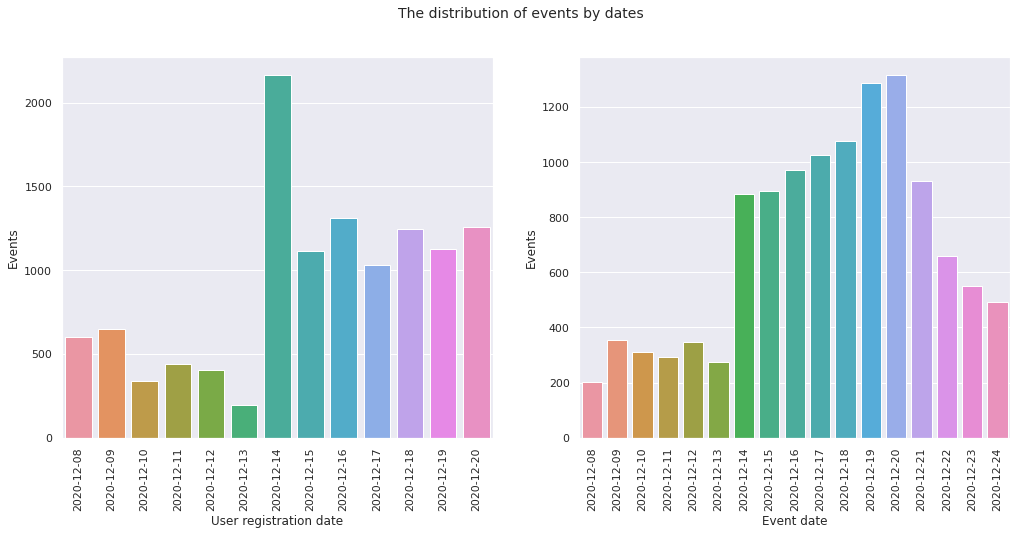

,0,1,2,3,4,5,6,7,8,9,10,11,12
first_date,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20
user_id,602,646,336,437,403,197,2164,1116,1313,1032,1244,1125,1256


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
event_dt,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24
user_id,203,353,311,291,348,274,885,895,970,1026,1077,1288,1315,931,658,552,494


In [52]:
df_dt = df.copy()
df_dt['event_dt'] = pd.to_datetime(df_dt['event_dt']).dt.date 
df_dt['first_date'] = pd.to_datetime(df_dt['first_date']).dt.date 

first_date = df_dt.pivot_table(index='first_date', values='user_id', aggfunc='count').reset_index()
event_dt = df_dt.pivot_table(index='event_dt', values='user_id', aggfunc='count').reset_index()


fig, ax = plt.subplots(1,2, figsize=(17, 7))
fig.suptitle('The distribution of events by dates', size=14)

sns.barplot(data=first_date, x='first_date', y='user_id', ax=ax[0])
ax[0].set_xlabel('User registration date', size=12)
ax[0].set_ylabel('Events', size=12)
ax[0].set_xticklabels(first_date['first_date'], rotation=90)

sns.barplot(data=event_dt, x='event_dt', y='user_id', ax=ax[1])
ax[1].set_xlabel('Event date', size=12)
ax[1].set_ylabel('Events', size=12)
ax[1].set_xticklabels(event_dt['event_dt'], rotation=90)

plt.show()

display(first_date.T)
display(event_dt.T)


В части отклонений по датам следует отметить, что **наибольшее количество пользователей (2164 чел.) зарегистрировались 14 декабря 2020 года.**

В рамках событий наибольшее их число приходится на предрождественские выходные - 19 и 20 декабря 2020 года

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Стоит посмотреть, много ли таких событий и нет ли каких еще отклонений по датам
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Дополнил выше</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b> Ок
</div>

Проверим, есть ли пересечения по датам:

In [26]:
marketing_events_EU = marketing_events[marketing_events['regions'].str.contains('EU')].copy()
marketing_events_EU

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


In [27]:
marketing_events_EU.loc[marketing_events_EU['start_dt'] < '2020-12-07', 'too_early'] = 1
marketing_events_EU.loc[marketing_events_EU['start_dt'] >= '2020-12-07', 'too_early'] = 0
marketing_events_EU['too_early'] = marketing_events_EU['too_early'].astype('int64')

marketing_events_EU

,name,regions,start_dt,finish_dt,too_early
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,0
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,1
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,1
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,1
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01,1
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03,1
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10,1


Требуется удалить только рождественские и новогодние события, остальные произошли слишком рано

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Ты правильно выделяешь событие промо-акции по датам и региону
</div>

In [28]:
df = df[~(df['event_dt'] >= '2020-12-25') & (df['event_dt'] <= '2021-01-03')].reset_index(drop=True)
df

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:59,product_page,NaN
2,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:02,login,NaN
3,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:58,login,NaN
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac,2020-12-20 19:06:22,purchase,4.99
...,...,...,...,...,...,...,...,...,...
11937,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,NaN
11938,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,NaN
11939,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,NaN
11940,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,NaN


In [29]:
df['user_id'].nunique()

2010

Число пользователей ниже 6 тысяч, указанных в ТЗ, однако иные участники не подходили по параметрам.

In [30]:
df.pivot_table(index='group', values='user_id', aggfunc='nunique')

,user_id
group,
A,1542
B,468


Группы разделены неравномерно: в контрольной группе А пользователей больше почти в 3,3 раза.

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> На этом шаге тобой не проведена оценка количества событий после 14 дня с момента регистрации для каждого конкретного пользователя. То есть, например, У пользователя зарегистрированного 7 декабря, могут быть события 30 декабря. Для теста нам эти события не нужны
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Дополнил:</div>

In [31]:
df['event_dt'] = pd.to_datetime(df['event_dt'])
df['diff_days'] =((df['event_dt'] - df['first_date']) / np.timedelta64 (1, 'D')).round(1)

df['diff_days'].sort_values(ascending=False)

6978     17.0
2727     17.0
2723     17.0
6981     17.0
11387    16.9
         ... 
6168      0.0
4612      0.0
4610      0.0
4608      0.0
2867      0.0
Name: diff_days, Length: 11942, dtype: float64

Исключим события, произошедшие после 14 дней после регистрации:

In [32]:
df = df[df['diff_days'] <= 14].reset_index(drop=True)
df

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,diff_days
0,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN,0.7
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:59,product_page,NaN,1.0
2,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:02,login,NaN,0.7
3,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:58,login,NaN,1.0
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac,2020-12-20 19:06:22,purchase,4.99,0.8
...,...,...,...,...,...,...,...,...,...,...
11866,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,NaN,1.8
11867,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,NaN,6.8
11868,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,NaN,0.2
11869,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,NaN,1.8


<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b> Проверка проведена
</div>

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Здесь нужно проверить соотношение участинков теста в Европе ко всем новым пользователям в Европе на те же даты(!)
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Дополнил:</div>

In [33]:
dates = list(df['first_date'].unique())
number_of_users_total = new_users[(new_users['region'] == 'EU') 
                                       & (new_users['first_date'].isin(dates)
                                         )]['user_id'].nunique()
number_of_users_total

33485

Всего 33485 пользователей из Европы на эти даты. Посмотрим пропорцию:

In [34]:
number_of_users_test = df['user_id'].nunique()

number_of_users_test / number_of_users_total

0.060026877706435715

Всего 6% пользователей от числа всех новых пользователей в Европе на те же даты стали участниками теста



**Промежуточный вывод:**

ТЗ соблюдено не в полной мере: 
 - вместо 6000 чел. количество участников составило 2010 чел.; 
 - вместо 15% новых пользователей из региона EU - 6%. 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b> Верно
</div>

##  Исследовательский анализ данных

In [35]:
# количество событий на пользователя по группам

events_per_user = df.pivot_table(index='group', values='user_id', aggfunc=['count', 'nunique']).rename(
    columns={'user_id': '', 'count': 'events', 'nunique': 'users'})
events_per_user['mean'] = (events_per_user['events'] / events_per_user['users']).round(1)

events_per_user

,events,users,mean
,,,
group,,,
A,9608,1542,6.2
B,2263,468,4.8


Разница по среднему количеству событий на пользователя не столько сущенственна: 6,3 для группы А и 4,9 для группы B.

In [53]:
spreading = df.pivot_table(index=['group', 'event_name'], values='user_id', 
                           aggfunc='count').reset_index()

fig = px.bar(spreading, 
             x='event_name', 
             y='user_id', 
             color='group', 
             text='user_id',
             barmode='group')
fig.update_layout(
        title='The number of events by groups',
        title_x = 0.5,
        xaxis_title='Groups',
        yaxis_title='Number of events',
        margin=dict(l=0, r=0, t=30, b=0),
        legend_title_text='Groups'
   )
fig.show()

display(spreading)

,group,event_name,user_id
0,A,login,4245
1,A,product_cart,1341
2,A,product_page,2736
3,A,purchase,1286
4,B,login,1131
5,B,product_cart,322
6,B,product_page,556
7,B,purchase,254


В абсолютном выражении разница более выражена, однако и число пользователей в группе А больше более чем в 3 раза. 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> У тебя получились хорошие графики, помогающие визуально оценить разницу между группами
</div>

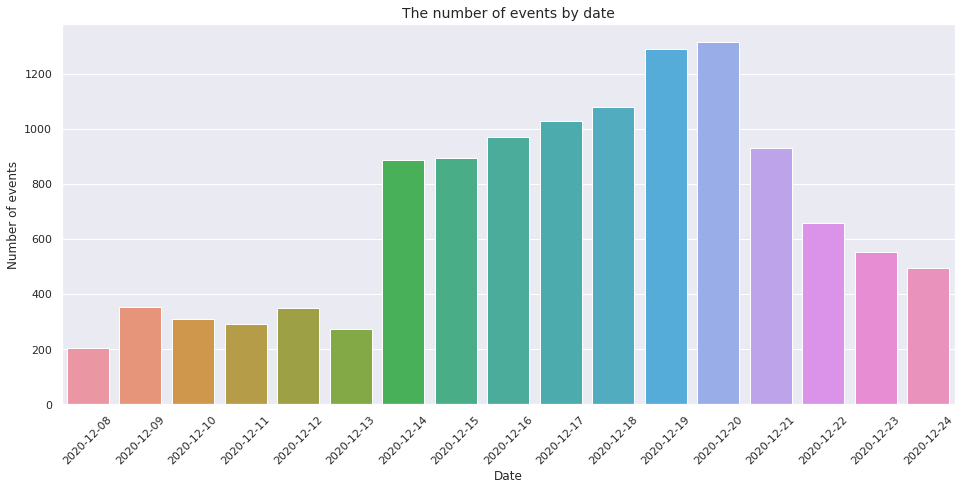

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
event_dt,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24
user_id,203,353,311,291,348,274,885,895,970,1026,1077,1288,1315,931,658,552,494


In [54]:
# распределение по дням

df_date = df.copy()
df_date['event_dt'] = pd.to_datetime(df_date['event_dt']).dt.date # уберем время

days_consolidated = df_date.pivot_table(index='event_dt', values='user_id', aggfunc='count').reset_index()

plt.figure(figsize=(16, 7))
sns.barplot(data=days_consolidated, x='event_dt', y='user_id')
plt.title('The number of events by date', size=14)
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.show()

days_consolidated.T

Как видно, наибольшее число событий приходится на 19 и 20 декабря 2020 года - субботу и воскресенье (1288 и 1315 шт. соответственно). По календарю это даты перед рождеством - вероятно пользователи активно выбирали подарки.

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b>  Здесь нужно посмотреть динамику по группам
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Дополнил</div>

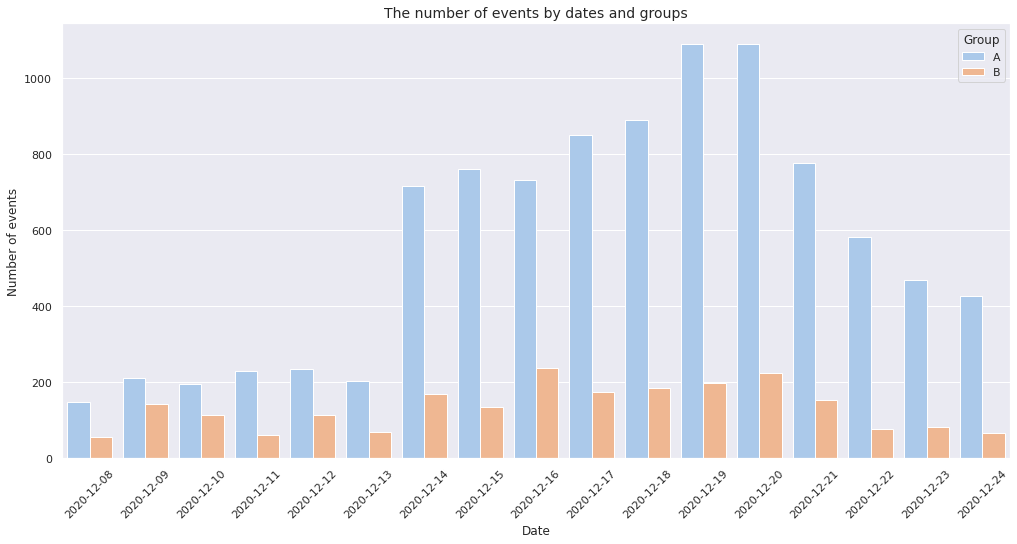

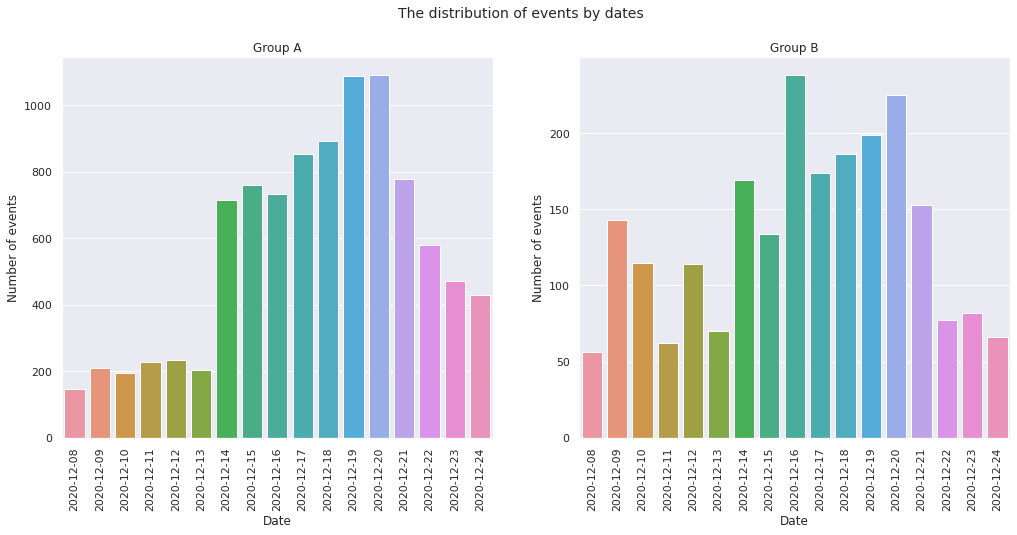

In [55]:
# динамика по группам
df_date = df.copy()
df_date['event_dt'] = pd.to_datetime(df_date['event_dt']).dt.date # уберем врем
days = df_date.pivot_table(index=['event_dt', 'group'], values='user_id', aggfunc='count').reset_index()

# сводный график
plt.figure(figsize=(17, 8))
sns.barplot(data=days, x='event_dt', y='user_id', hue='group')
plt.title('The number of events by dates and groups', size=14)
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.show()

# отдельные графики
fig, ax = plt.subplots(1,2, figsize=(17, 7))
fig.suptitle('The distribution of events by dates', size=14)
i = 0

for group in list(days['group'].unique()):
    sns.barplot(data=days[days['group'] == group], x='event_dt', y='user_id', ax=ax[i])
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Number of events')
    ax[i].set_xticklabels(days[days['group'] == group]['event_dt'], rotation=90)
    ax[i].title.set_text('Group {}'.format(group))
    i += 1
plt.show()
    

Как видно, динамика по группам отличается: так, для группы B характерно неожиданное увеличение событий 16 декабря 2020 г. (в среду) а также закономерные увеличения 19 и 20 декабря 2020 года - в субботу и воскресенье перед Рождеством.

Кроме того, изначально наблюдается относительно высокое число событий 9 декабря 2020 г, в среду. Спад в последующие дни также более стремителен в сравнении с группой A.

<div class="alert alert-block alert-warning">
<b> ⚠️ Комментарий ревьюера 2:</b> Стоит по-подробнее описать причины, которые могли вызвать резкое увеличение событий группы А
</div>

<div class="alert alert-info"><b>Комментарий студента 2:</b> Предполагаю, что причины могу быть следующими:</div>

Так как в рамках A/B-тестирования проводился анализ улучшенной рекомендательной системы, можно предположить, что в контрольной группе A поведение пользователей было во многом случайным. Так, люди совершали больше действий для того, чтобы определить, что именно они хотели приобрести.

В свою очередь, тестовая группа B получала соответствующие их запросам рекомендации, что, вероятно, позволило оптимизировать клиентский путь.

In [56]:
# воронки
funnel_a = df[df['group'] == 'A'].pivot_table(index='event_name', values='user_id', 
                           aggfunc='nunique').reset_index()
funnel_a = funnel_a.reindex([0,2,1,3])
funnel_a = funnel_a.assign(previous_stage = lambda x: x['user_id'] / x['user_id'].shift() * 100).round(1) # доля предыдущего этапа
funnel_a = funnel_a.assign(user_loss = lambda x: (1 - x['user_id'] / x['user_id'].shift()) * 100).round(1) # потери
funnel_a['previous_stage'] = funnel_a['previous_stage'][funnel_a['previous_stage'].notna()].astype(str) + '%'


funnel_b = df[df['group'] == 'B'].pivot_table(index='event_name', values='user_id', 
                           aggfunc='nunique').reset_index()
funnel_b = funnel_b.reindex([0,2,1,3])
funnel_b = funnel_b.assign(previous_stage = lambda x: x['user_id'] / x['user_id'].shift() * 100).round(1) # доля предыдущего этапа
funnel_b = funnel_b.assign(user_loss = lambda x: (1 - x['user_id'] / x['user_id'].shift()) * 100).round(1) # потери
funnel_b['previous_stage'] = funnel_b['previous_stage'][funnel_b['previous_stage'].notna()].astype(str) + '%'


fig = make_subplots(rows=1, cols=2, subplot_titles=('Group A', 'Group B'))

fig.add_trace(
    go.Funnel(
    y = funnel_a['event_name'],
    x = funnel_a['user_id'],
    textposition = 'inside',
    text = funnel_a['previous_stage'],
    marker = {'color': '#1c1847'}),
    row=1, col=1)

fig.add_trace(
    go.Funnel(
    y = funnel_b['event_name'],
    x = funnel_b['user_id'],
    textposition = 'inside',
    text = funnel_b['previous_stage'],
    marker = {'color': '#ff0000'}),
    row=1, col=2)

fig.update_layout(showlegend=False,
                 title='Group funnels',
                 title_x = 0.5)
fig.show()

display(funnel_a)
display(funnel_b)

,event_name,user_id,previous_stage,user_loss
0,login,1542,NaN,NaN
2,product_page,1004,65.1%,34.9
1,product_cart,488,48.6%,51.4
3,purchase,489,100.2%,-0.2


,event_name,user_id,previous_stage,user_loss
0,login,468,NaN,NaN
2,product_page,247,52.8%,47.2
1,product_cart,136,55.1%,44.9
3,purchase,120,88.2%,11.8


Конверсия для групп отличается не столь значительно, однако требуется статистическая проверка данной гипотезы.

**При этом из особенностей при проведении A/B-тестирования нужно учесть, что контрольная группа более чем в 3 раза больше тестовой.**

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Мы изучаем путь пользователя, а не количество совершенных событий, поэтому следует посчитать воронку через количество уникальных пользователей на каждом этапе
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Воронки переработал</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b> Воронки построены верно
</div>

**Промежуточные выводы**

Мы провели исследовательский анализ данных. Удалось установить следующее:

- в группе А пользователей больше почти в 3,3 раза;
 
- разница по среднему количеству событий на пользователя не столько сущенственна: 6,3 для группы А и 4,9 для группы B;
 
- наибольшее число событий приходится на 19 и 20 декабря 2020 года - субботу и воскресенье (1288 шт. и 1315 шт. соответственно);
 
- для группы B характерно неожиданное увеличение событий 16 декабря 2020 г. (в среду), и спад в последующие дни также более стремителен в сравнении с группой A;
 
- конверсия для групп отличается не столь значительно, однако требуется статистическая проверка данной гипотезы.

## Оценка результатов A/B-тестирования

In [40]:
events_per_user

,events,users,mean
,,,
group,,,
A,9608,1542,6.2
B,2263,468,4.8


Контрольная группа А включает 1542 человека, тестовая группа B - 468 человека.

**В качестве порогового уровеня статистической значимост (alpha) предлагается взять значение 0,05.** 

In [41]:
alpha = 0.05

Проверим, находят ли статистические критерии разницу между группами A и B.

Создадим таблицу для сравнения действий пользователей в группах:

In [42]:
user_groups = df.pivot_table(index='event_name', values='user_id', columns='group', aggfunc='nunique').reset_index()
user_groups = user_groups.set_index('event_name')
user_groups

group,A,B
event_name,,
login,1542,468
product_cart,488,136
product_page,1004,247
purchase,489,120


Наша задача проверить, оказало ли влияние внедрение улучшенной рекомендательной системы на увеличение каждой метрики не менее, чем на 10%. *При этом согласно ТЗ событие login мы не тестируем.*

**Сформулируем гипотезы:**

1) Нулевая гипотеза: различий в количестве событий между группами нет.

2) Обратная гипотеза: различия в количестве событий между группами есть.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Ты правильно расставляешь акценты в формировании гипотез и формулируешь в соответствии со статистическими нормами
</div>

In [43]:
# функция для z-теста

def mega_stat_check(name, group_1, group_2, alpha):
    
    # события в группах
    n_unique_gr1 = df[(df['group'] == group_1) & (df['event_name'] != 'login')][
        'user_id'].nunique() # событие login мы не тестируем
    n_unique_gr2 = df[(df['group'] == group_2) & (df['event_name'] != 'login')][
        'user_id'].nunique() # событие login мы не тестируем

    # пропорции событий в группах:
    p1 = user_groups.loc[name, group_1] / n_unique_gr1
    p2 = user_groups.loc[name, group_2] / n_unique_gr2
    
    # пропорция в комбинированном датасете:
    p_combined = (user_groups.loc[name, group_1] + user_groups.loc[name, group_2]) / (n_unique_gr1 + n_unique_gr2)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/n_unique_gr1 + 1/n_unique_gr2))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('{}:'.format(name))
    print('P-value составляет:', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.')
    print()

In [44]:
for name in list(user_groups.index[1:]):
    mega_stat_check(name, 'A', 'B', alpha)

product_cart:
P-value составляет: 0.6869262576818445
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

product_page:
P-value составляет: 0.005096981356092822
Отвергаем нулевую гипотезу: между долями есть значимая разница.

purchase:
P-value составляет: 0.22905773201319102
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.



Статистически значимая разница наблюдается только для события product_page.

Тем не менее, так как проверка событий у нас множественная, **воспользуемся поправкой Бонферрони**:

In [45]:
alpha_bonferroni = alpha / 3
alpha_bonferroni

0.016666666666666666

In [46]:
for name in list(user_groups.index[1:]):
    mega_stat_check(name, 'A', 'B', alpha_bonferroni)

product_cart:
P-value составляет: 0.6869262576818445
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

product_page:
P-value составляет: 0.005096981356092822
Отвергаем нулевую гипотезу: между долями есть значимая разница.

purchase:
P-value составляет: 0.22905773201319102
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.



**Промежуточный вывод**

Для событий product_cart и purchase контрольные и тестовые группы равны между собой, в связи с чем внедрение улучшенной рекомендательной системы не оказывает влияние на увеличение соответствующих метрик.

В свою очередь, для product_page наблюдается увеличение количества пользователей.

Таким образом, ожидаемый эффект от внедрения новой рекомендательной системы не подвердился: **за 14 дней с момента регистрации в системе пользователи не показали улучшение каждой метрики не менее, чем на 10%**. 

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b>  Здесь также надо проверять исходя из количества пользователей, а не событий
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Переработал</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 2:</b> Отлично
</div>

## Выводы

Мы проанализировали 11871 событие 2010 пользователей, разбитых на 2 группы, тестовую и контрольную.

Следует отметить, что **ТЗ для при проведении A/B-тестирования было соблюдено не в полной мере.** В частности:
 - вместо 6000 чел. количество участников теста составило 2010 чел.;
 - вместо 15% новых пользователей из региона EU - лишь 6%.

Таким образом, к результатам теста остаются вопросы. Тем не менее, в результате нализа удалось установить следующее:

- в контрольной группе А пользователей больше почти в 3,3 раза, чем в тестовой группе B (1542 и 468 человек соответственно);
- разница по среднему количеству событий на пользователя не столько существенна: 6,3 для группы А и 4,9 для группы B;
- для группы B характерно неожиданное увеличение событий 16 декабря 2020 г. (среда), а также закономерные увеличения 19 и 20 декабря 2020 года - в субботу и воскресенье перед Рождеством; кроме того, наблюдается относительно высокое число событий 9 декабря 2020 г., также в среду. Спад в последующие дни более стремителен в сравнении с группой A;
- конверсия для групп отличается не столь значительно.

В части результатов A/B-тестирования:
- для событий product_cart и purchase контрольные и тестовые группы равны между собой, в связи с чем внедрение улучшенной рекомендательной системы не оказывает влияние на увеличение соответствующих метрик
- в свою очередь, для product_page наблюдается увеличение количества пользователей

На основе данных имеющихся данных ожидаемый эффект от внедрения новой рекомендательной системы не подвердился: за 14 дней с момента регистрации в системе пользователи не показали улучшение каждой метрики не менее, чем на 10%. 

**Вместе с тем, так как ТЗ не было соблюдено, результаты A/B-теста доверия не вызывают. В связи с этим для решения бизнес-задачи внедрения улучшенной рекомендательной систему для всех пользователей или сохранения текущей, необходимо провести A/B-тестирование заново, соблюдая требования технического задания.

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера:</b> Нужно добавить больше информации, в чем проблема ТЗ, а также сделать вывод о том, корректно ли проведён тест и можно ли ему доверять
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Вывод дополнил</div>

<div class="alert alert-block alert-danger">
<b> ❌ Комментарий ревьюера 2:</b> То есть ты считаешь, что несмотря на много ошибок, тесту можно доверять?
</div>

<div class="alert alert-info"><b>Комментарий студента 2:</b> Нет, нельзя - я неправильно расставил акценты в выводе) Переписал </div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера 3:</b> Хорошо, теперь выводы обоснованы и все обстоятельства учтены
</div>